## Content

1. Introduction

1. Loading Scania Trucks Dataset and Characterisation of the Dataset

1. Dealing with Missing Data

1. Checking Class Feature

1. Working with NaN values

1. Dropping features and rows

1. Calculate the skewness of the dataset

1. Replacing NaNs using Median of the column

1. Training (Without Dimensionality Reduction)

1. PCA

1. Findings

1. Conclusion

1. References

## 1. Introduction

The collection is made up of information gathered from large Scania vehicles in regular use. The system under consideration is the Air Pressure System (APS), which creates pressured air used for various truck operations like braking and gear changes. Component failures for a certain APS system component make up the datasets' positive class. Trucks in the bad class have malfunctions for parts unrelated to the APS. An expert-selected subset of all accessible data makes up the data.

## 2. Loading Scania Trucks Dataset and Characterisation of the Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA

import warnings
warnings.simplefilter("ignore")

In [2]:
trucks_df = pd.read_csv("aps_failure_set.csv")

In [3]:
trucks_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


<div class="alert alert-block alert-info"> 📌 It is clear from a visual examination of the raw data that certain columns have missing values. My target set is in the first column labeled "class".</div>

In [4]:
trucks_df['class'].replace('neg', 0, inplace = True)
trucks_df['class'].replace('pos', 1, inplace = True)

<div class="alert alert-block alert-info"> 📌 Replace categorical data "neg" and "pos" with 0, 1.</div>

In [5]:
trucks_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,0,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,0,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,0,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,0,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [6]:
trucks_df.dtypes

class      int64
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object

<div class="alert alert-block alert-info"> 📌 Just with this presentation we can see that we are dealing with missing data. It is true to say that some of the values in our dataframe are tainted.</div>

In [7]:
trucks_df.shape

(60000, 171)

<div class="alert alert-block alert-info"> 📌 Dataset consists of 60,000 rows and 171 features.</div>

In [8]:
duplicate_rows_trucks = trucks_df[trucks_df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_trucks.shape)

number of duplicate rows:  (0, 171)


In [9]:
trucks_df.describe()

,class,aa_000
count,60000.000000,6.000000e+04
mean,0.016667,5.933650e+04
std,0.128020,1.454301e+05
min,0.000000,0.000000e+00
25%,0.000000,8.340000e+02
50%,0.000000,3.077600e+04
75%,0.000000,4.866800e+04
max,1.000000,2.746564e+06


<div class="alert alert-block alert-info"> 📌 Descriptive statistics of numerical variables.</div>

In [10]:
trucks_df.describe(include=object)

,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000,...,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000
unique,30,2062,1887,334,419,155,618,2423,7880,23072,...,34489,31712,35189,36289,31796,30470,24214,9725,29,50
top,na,0,na,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,46329,8752,14861,55543,55476,59133,58587,56181,46894,1305,...,1364,1557,1797,2814,4458,7898,17280,31863,57021,56794


<div class="alert alert-block alert-info"> 📌 Descriptive statistics of categorical variables. After the correction of the dataframe, it is expected that this situation will change.</div>

## 3. Dealing with Missing Data

<div class="alert alert-block alert-info"> 📌 One way of finding whether we have null values in the data is by using the isnull() function.</div>

In [11]:
trucks_df.isnull().values.any()

False

<div class="alert alert-block alert-info"> 📌 Another way is using df.info().</div>

In [12]:
trucks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(2), object(169)
memory usage: 78.3+ MB


<div class="alert alert-block alert-info"> 📌 The presence of 169 categorical variables is an indication that there are NaN values.</div>

## 4. Checking Class Feature

In [13]:
trucks_df["class"].value_counts()

0    59000
1     1000
Name: class, dtype: int64

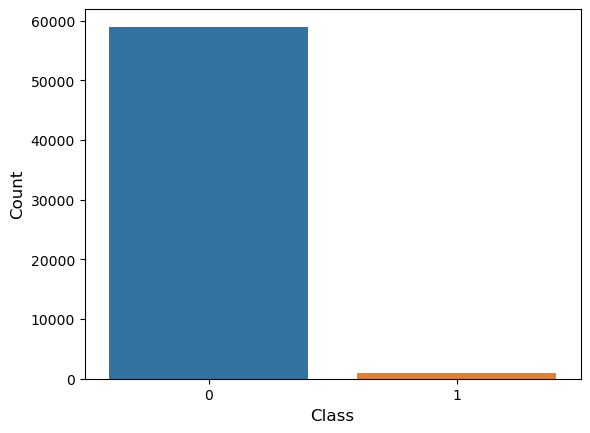

<Figure size 600x200 with 0 Axes>

In [14]:
#Countplot
sns.countplot(x="class", data=trucks_df)
plt.xlabel("Class", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.figure(figsize=(6,2))
plt.show()

<div class="alert alert-block alert-info"> 📌 The 'class' feature, also the target attribute for this model, is highly imbalanced (the number of samples in one class is much larger than in another class).

1. Positive class (1)- comprises of APS system component failures for a particular component.
1. Negative class (0)- consists of trucks with problems with parts that are not APS-related.</div>

<div class="alert alert-block alert-info"> 📌 If necessary precautions are not taken, specifically class imbalance and missing values, can impact how well any machine learning system performs.</div>

## 5. Working with NaN values

In [15]:
md = trucks_df.isnull().sum().sum()
print("Total of missing data in our dataframe :", md)
no_md = trucks_df.notna().sum().sum()
print("Total of data in our dataframe :", no_md)
per_md = (md/no_md)*100
print("Percentual of missing data :", "%.2f" % per_md)

Total of missing data in our dataframe : 0
Total of data in our dataframe : 10260000
Percentual of missing data : 0.00


<div class="alert alert-block alert-info"> 📌 This dataset is known to have a high number of missing values. Sometimes though, instead of np.nan null values could be present as empty strings or other values that represent null values, so we must be careful and make sure that all the null values in our dataset are np.nan values.</div>

In [16]:
# a list with all missing value formats
missing_value_formats = ["n.a.","?","NA","n/a", "na", "--"]
trucks_df = pd.read_csv("aps_failure_set.csv", na_values = missing_value_formats)

<div class="alert alert-block alert-info"> 📌 Now I have all my missing values in the same format.</div>

In [17]:
# Creating a dictionary whose keys are the column names and values are the percentage of missing values
nan_count = {k:list(trucks_df.isna().sum()*100/trucks_df.shape[0])[i] for i,k in enumerate(trucks_df.columns)}

# Sorting the dictionary in descending order based on the percentage of missing values
nan_count = {k: v for k, v in sorted(nan_count.items(), key=lambda item: item[1],reverse=True)}

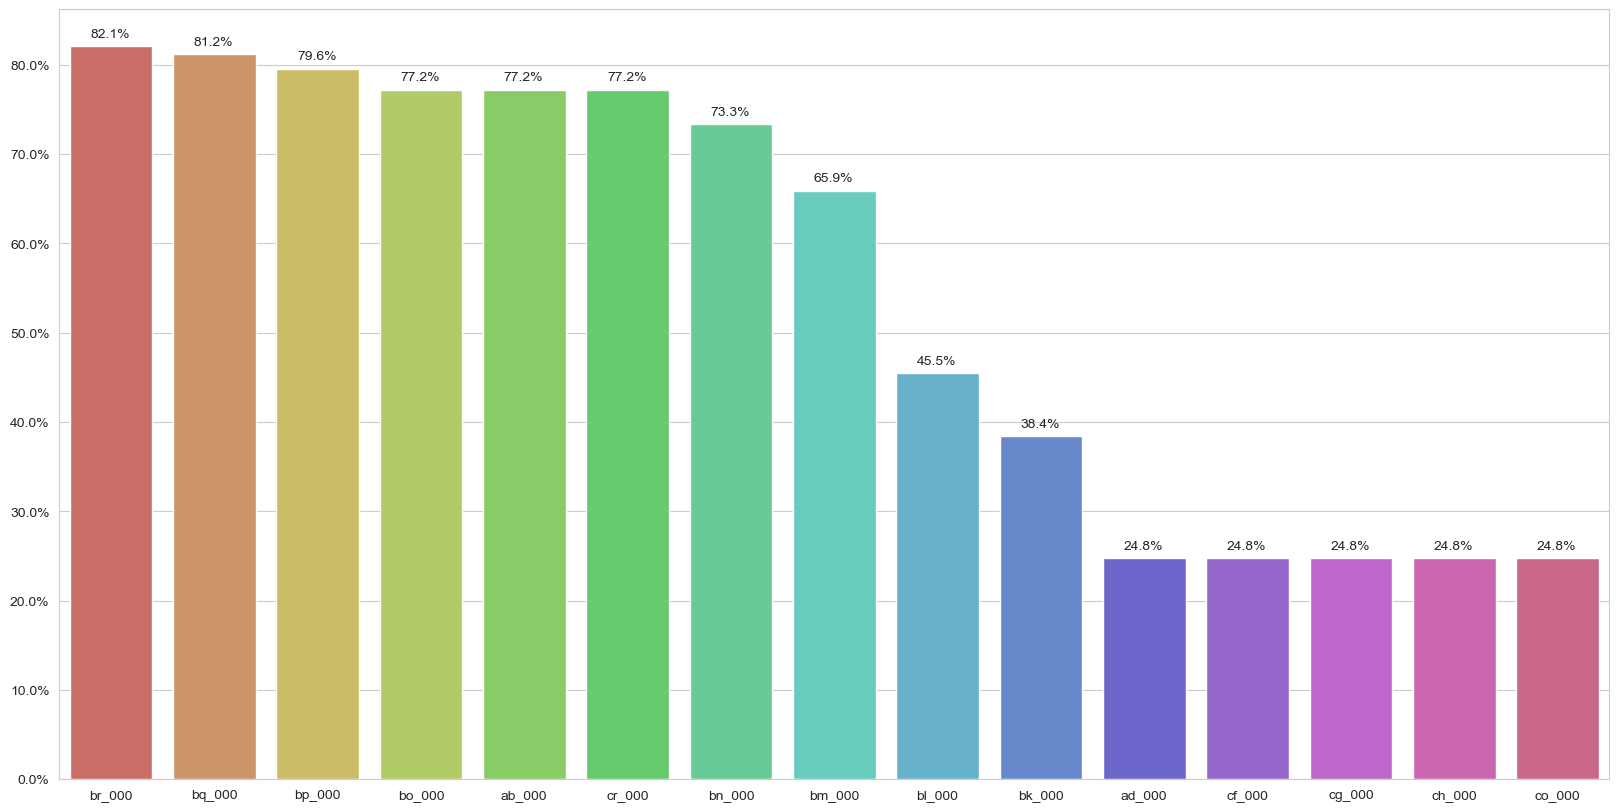

In [18]:
# Plotting a graph showing the top 15 features having highest percentage of missing values 
sns.set_style(style="whitegrid")
plt.figure(figsize=(20,10))

# Bar Plot
plot = sns.barplot(x= list(nan_count.keys())[:15],y = list(nan_count.values())[:15],palette="hls")

# Add annotations above each bar signifying their value
for p in plot.patches:
        plot.annotate('{:.1f}%'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+1))

# Make y-axis more interpretable
plot.set_yticklabels(map('{:.1f}%'.format, plot.yaxis.get_majorticklocs())) 
plt.show()

<div class="alert alert-block alert-info"> 📌 The percentage of missing data is significantly high in some features (As high as 82% in a feature).I will drop columns containing more than 70% of missing values.</div>

(RICO,2019)

## 6. Dropping features and rows

In [19]:
# Only keep columns with at least 70% non-NaN values
trucks_new = trucks_df.dropna(thresh=0.7*len(trucks_df), axis=1)

In [20]:
trucks_new.shape

(60000, 161)

In [21]:
trucks_clean = trucks_new.dropna(thresh=0.7*len(trucks_new.columns))

In [22]:
trucks_clean.shape

(57107, 161)

<div class="alert alert-block alert-info"> 📌 I discarded features and rows with more than 70% missing values.</div>

<div class="alert alert-block alert-info"> 
    
1. Earlier shape of x: (60000, 171);
1. Shape after removal of rows and columns: (57107, 161).
1. 10 features and 2893 rows were thus removed.
</div>

## 7. Calculate the skewness of the dataset

In [23]:
# Calculate the skewness of the DataFrame
skewness = trucks_new.skew(axis = 0, skipna = True)

print("The skewness of the DataFrame is:\n", skewness)

The skewness of the DataFrame is:
 aa_000      6.115752
ac_000      1.784845
ad_000    212.459406
ae_000     90.588252
af_000     51.671770
             ...    
ee_007     15.717250
ee_008     13.426265
ee_009     29.214135
ef_000     73.432440
eg_000     89.029482
Length: 160, dtype: float64


In [24]:
# Count how many columns are skewed to the left and how many are skewed to the right
left_skewed = sum(skewness < 0)
right_skewed = sum(skewness > 0)
not_skewed = sum(skewness == 0)

print(f"Out of {len(skewness)} columns, {left_skewed} are skewed to the left, {right_skewed} are skewed to the right, and {not_skewed} are not skewed.")

Out of 160 columns, 0 are skewed to the left, 159 are skewed to the right, and 1 are not skewed.


<div class="alert alert-block alert-info"> 📌 The result represents how skewed the dataset is. The skewness specifies whether the dataset is skewed to the left or the right. If the skewness is negative, the dataset is biased to the left (negative skew), and if the skewness is positive, the dataset is skewed to the right (positive skew). The dataset is said to be symmetrical when the skewness value is 0.</div>

(RICO, 2019)

## 8. Replacing NaNs using Median of the column

<div class="alert alert-block alert-info"> 📌 I imputed the rest of missing values using median. When the data is skewed, it is good to consider using the median value for replacing the missing values.</div>

In [25]:
newtrucks_clean = trucks_clean.fillna(trucks_clean.median())

In [26]:
newtrucks_clean.shape

(57107, 161)

In [27]:
newtrucks_clean.isnull().sum().sum()

0

In [28]:
newtrucks_cleaned = newtrucks_clean.reset_index(drop=True)

In [29]:
newtrucks_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57107 entries, 0 to 57106
Columns: 161 entries, class to eg_000
dtypes: float64(159), int64(1), object(1)
memory usage: 70.1+ MB


          aa_000    ac_000    ad_000    ae_000    af_000    ag_000    ag_001  \
aa_000  1.000000 -0.045556 -0.001659  0.056905  0.082263  0.019534  0.143472   
ac_000 -0.045556  1.000000 -0.001863 -0.005021 -0.010467  0.017336 -0.005705   
ad_000 -0.001659 -0.001863  1.000000 -0.000176 -0.000219 -0.000042 -0.000112   
ae_000  0.056905 -0.005021 -0.000176  1.000000  0.822833 -0.000437 -0.001011   
af_000  0.082263 -0.010467 -0.000219  0.822833  1.000000 -0.000543 -0.001241   
...          ...       ...       ...       ...       ...       ...       ...   
ee_007  0.578608 -0.036166 -0.000785  0.048967  0.065787  0.000431  0.055299   
ee_008  0.410622  0.009962 -0.001449 -0.010878 -0.014011 -0.000850  0.005773   
ee_009  0.199553  0.021956 -0.000819 -0.008197 -0.010226 -0.001263 -0.004352   
ef_000  0.017095 -0.006751 -0.000087  0.070909  0.106476 -0.000075  0.002473   
eg_000  0.032323  0.014317 -0.000101  0.041730  0.060827  0.000240  0.009757   

          ag_002    ag_003    ag_004  .

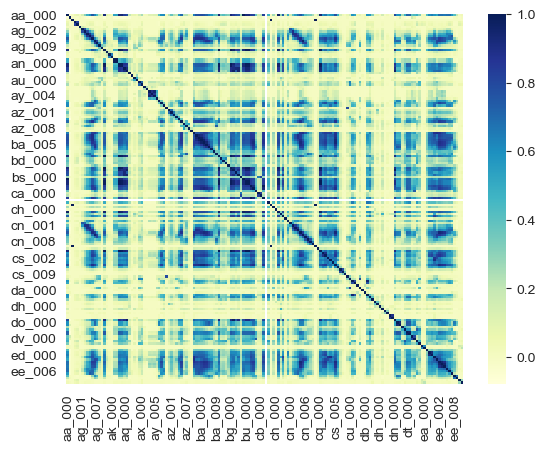

In [30]:
#Plotting heat map for feature correlation from correlation matrix
# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(newtrucks_cleaned.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(newtrucks_cleaned.corr(), cmap="YlGnBu", annot=False)
  
# displaying heatmap
plt.show()

<div class="alert alert-block alert-info"> 📌 It aids in forecasting how the variables' relationship will change over time. I can get a broad overview of the more or less significant association between various variables thanks to the correlation matrix.</div>

## 9. Training (Without Dimensionality Reduction)

### SMOTE and Feature Scaling

<div class="alert alert-block alert-info"> 📌 SMOTE (Synthetic Minority Over-sampling Technique) is a popular technique for balancing imbalanced datasets by oversampling the minority class and feature scaling is a technique for normalizing the variety of independent variables or features in data.</div>

In [31]:
from imblearn.over_sampling import SMOTE

# split the dataset into features (X) and target variable (y)
X = newtrucks_cleaned.drop('class', axis=1)
y = newtrucks_cleaned['class']

# apply SMOTE to balance the dataset
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# print the shape of the balanced dataset
print("Shape of balanced dataset:", X_res.shape, y_res.shape)

Shape of balanced dataset: (112756, 160) (112756,)


In [32]:
# Print the shape of training and testing data along with its labels.

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((90204, 160), (22552, 160), (90204,), (22552,))

In [33]:
# Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# Create KNN Classifier
kNN = KNeighborsClassifier(n_neighbors = 3)

# Train the model using the training sets
kNN.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = kNN.predict(X_test)

In [34]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(accuracy_score(y_test, y_pred))
print(cf_matrix)
print(classification_report(y_test, y_pred))

0.992550549840369
[[11234   165]
 [    3 11150]]
              precision    recall  f1-score   support

         neg       1.00      0.99      0.99     11399
         pos       0.99      1.00      0.99     11153

    accuracy                           0.99     22552
   macro avg       0.99      0.99      0.99     22552
weighted avg       0.99      0.99      0.99     22552



In [35]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

print("True Negative:", tn)
print("False Positive:", fp)
print("False Negative:", fn)
print("True Positive:", tp)

True Negative: 11234
False Positive: 165
False Negative: 3
True Positive: 11150


<div class="alert alert-block alert-info"> 📌 The accuracy shows the percentage of data that are correctly classified, In this case, 99% of our data are correctly classified (problems are not APS-related). When working with a class-imbalanced data set like this one, where there is a sizable difference between the amount of positive and negative labels, accuracy alone doesn't convey the whole story.</div>

<div class="alert alert-block alert-info"> 📌 I had 22552 values for the testing (y_test). 11150 values were predicted as Neg, 3 were classified as Pos but actually they are Neg (type II error). 11234 values were predicted as Pos and 165 were classified as Neg although they are Pos (type I error).</div>

## 10. PCA

#### Defining in my own words

<div class="alert alert-block alert-info"> 📌 It is mainly used when you are dealing with a very large number of variables and, therefore, reduce the number of variables of a data set, while preserving as much information as possible. Because smaller data sets are easier to explore and visualize and make analyzing data points much easier and faster for machine learning algorithms without extraneous variables to process. It would be like you had to summarise a 100 page book into 10 pages and keep the key points in those 10 pages.</div>

## Preprocessing

(0.0, 6.0)

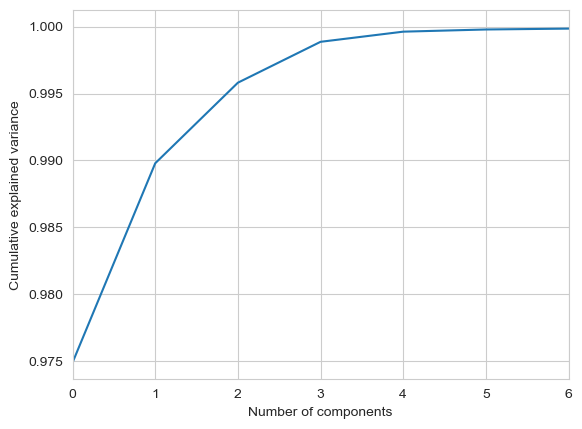

In [36]:
trucks_PCA = newtrucks_cleaned.drop(columns=["class"])
pca = PCA().fit(trucks_PCA)
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('Number of components') 
plt.ylabel('Cumulative explained variance'); 
plt.xlim(0,6)

<div class="alert alert-block alert-info"> 📌 Knowing how many components are necessary to describe the data is essential when applying PCA in practice. Looking at the cumulative explained variance ratio will reveal this.
You (David) asked to use PCA to establish the minimum number of features needed for retaining 99.5% variance. Based on the graph above, we can verify that 2 features are needed to contain 99.5% of the variance.</div>

## Dimentionality Reduction

In [37]:
pca = PCA(2)
projected = pca.fit_transform(trucks_PCA)

In [38]:
projected.shape

(57107, 2)

<div class="alert alert-block alert-info"> 📌 The transformed data has been reduced to 2 components based on the graph (Cumulative explained variance) presented earlier.</div>

In [39]:
trucks_pca = pd.DataFrame(projected, columns =['C1', 'C2'])

In [40]:
trucks_pca.head()

,C1,C2
0,1.777733e+09,3.018476e+05
1,-3.529674e+08,-5.498961e+06
2,-3.529685e+08,-5.747752e+06
3,-3.529543e+08,-6.377843e+06
4,-3.530209e+08,-5.038601e+06


In [41]:
trucks_pca["class"] = trucks_df["class"]

In [42]:
trucks_pca.head()

,C1,C2,class
0,1.777733e+09,3.018476e+05,neg
1,-3.529674e+08,-5.498961e+06,neg
2,-3.529685e+08,-5.747752e+06,neg
3,-3.529543e+08,-6.377843e+06,neg
4,-3.530209e+08,-5.038601e+06,neg


In [43]:
trucks_pca['class'].replace('neg', 0, inplace = True)
trucks_pca['class'].replace('pos', 1, inplace = True)

<div class="alert alert-block alert-info"> 📌 Replace categorical data "neg" and "pos" with 0, 1.</div>

In [44]:
trucks_pca.head()

,C1,C2,class
0,1.777733e+09,3.018476e+05,0
1,-3.529674e+08,-5.498961e+06,0
2,-3.529685e+08,-5.747752e+06,0
3,-3.529543e+08,-6.377843e+06,0
4,-3.530209e+08,-5.038601e+06,0


In [45]:
print('STATUS: Original Shape (before PCA): ', newtrucks_cleaned.shape) 
print('STATUS: Transformed Shape (after PCA): ',trucks_pca.shape) 

STATUS: Original Shape (before PCA):  (57107, 161)
STATUS: Transformed Shape (after PCA):  (57107, 3)


<div class="alert alert-block alert-info"> 📌 I present here all the features (independent and dependent variables) and rows of my new pattern.</div>

In [46]:
trucks_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57107 entries, 0 to 57106
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   C1      57107 non-null  float64
 1   C2      57107 non-null  float64
 2   class   57107 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 1.3 MB


<div class="alert alert-block alert-info"> 📌 Here we can notice that the 2 new columns that contain the pattern of the Data are numerical variables. Besides, the amount of memory used for this date fell drastically when compared with the previous one, reaffirming the concept of the use of PCA.</div>

In [47]:
trucks_pca['class'].value_counts()

0    56150
1      957
Name: class, dtype: int64

In [48]:
trucks_array = trucks_pca.values

In [49]:
from sklearn.model_selection import train_test_split
X = trucks_array[:,0:2]
y = trucks_array[:,2]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print the shape of the balanced dataset
print("Shape of balanced dataset:", X.shape, y.shape)

Shape of balanced dataset: (57107, 2) (57107,)


In [50]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((45685, 2), (11422, 2), (45685,), (11422,))

<div class="alert alert-block alert-info"> 📌 The train-test split procedure is used again to estimate the performance of the following machine learning algorithms.</div>

In [51]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

<div class="alert alert-block alert-info"> 📌 In this step, I will run all the machine learning algorithms with their respective accuracy as we saw in class </div>

In [52]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.661101 (0.305034)
LDA: 0.983496 (0.000107)
KNN: 0.983452 (0.000174)
CART: 0.966379 (0.001584)
NB: 0.982204 (0.000918)


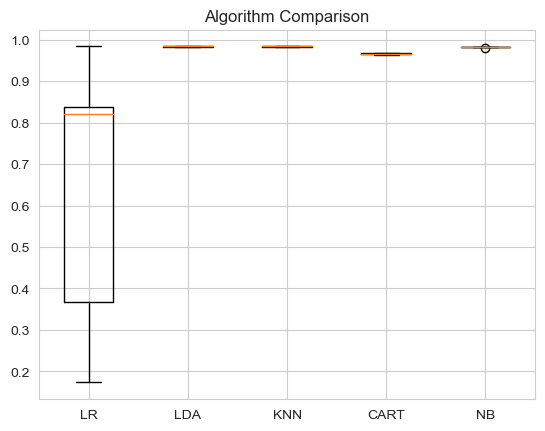

In [53]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [54]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

In [55]:
#Generate the confusion matrix
cf_matrix = confusion_matrix(Y_test, predictions)

print(accuracy_score(Y_test, predictions))
print(cf_matrix)

0.9813517772719313
[[11209     9]
 [  204     0]]


In [56]:
tn, fp, fn, tp = confusion_matrix(Y_test, predictions).ravel()

print("True Negative:", tn)
print("False Positive:", fp)
print("False Negative:", fn)
print("True Positive:", tp)

True Negative: 11209
False Positive: 9
False Negative: 204
True Positive: 0


<div class="alert alert-block alert-info"> 📌 Through the last analysis, we can see that the reduction of features had direct repercussions on accuracy, however, this was already expected. Now we have a simpler data to be analyzed and visualized, as well as, we can run the machine learning algorithms in a faster way.

Furthermore, by analyzing the confusion matrix, we can observe that of the 11422 values tested in the new analysis, 11203 were predicted correclty. However, 15 were wrongly classified as Neg and 204 were wrongly classified as Pos.</div>

## 11. Findings

1. Binary Classification problem;
1. 60,000 data points and 171 features;
1. No duplicated rows;
1. Highly imbalanced dataset;
1. The target variable is'class'.
1. Large part of the data is missing (9.03%).
1. Most of the attributes are skewed to the right.
1. SMOTE, Scaling and PCA are necessary to work with the Dataset.

## 12. Conclusion

1. After analyzing the Data it was possible to notice a large presence of missing values and how imbalanced my target variable is.
1. Before working with my missing values, my Data had 170 strings and 1 int64.
1. In my first phase of missing data cleaning, I removed all columns and rows with more than 70% missing values. Right after that, I realized that my features were skewed to the right and replaced the rest of NaN by the median.
1. After cleaning, I was left with 161 features and 57107 lines.
1. I balanced my target variable using SMOTE and normalised using Scaling and applied the machine learning algorithm to compare it with my post-PCA accuracy. Accuracy: 0.992550549840369
1. After applying the PCA and generating the variance plot, I observed that only 2 columns were needed, as they contained 99.5% of the variance.Transformed Shape (after PCA):  (57107, 3)
1. After applying PCA and Machine Learning algorithms (to predict), I got an accuracy only 1% lower than before (0.9808264752232534).
1. Correctly predicted that the problems are not related to APS.
1. In summary, I have a smaller dataset to work with and less space to occupy.

## 13. References

Gondek, C., Hafner, D. and Sampson, O.R. (1970) Prediction of failures in the air pressure system of Scania trucks using a random forest and feature engineering, SpringerLink. Springer International Publishing. Available at: https://link.springer.com/chapter/10.1007/978-3-319-46349-0_36 (Accessed: April 18, 2023). 

Müller, A.C. and Guido, S. (2018) Introduction to machine learning with python: A guide for data scientists. Sebastopol: O'Reilly Media. 

Selvi, K.T. et al. (2022) “Air Pressure System Failure Prediction and classification in Scania trucks using machine learning,” 2022 Second International Conference on Artificial Intelligence and Smart Energy (ICAIS) [Preprint]. Available at: https://doi.org/10.1109/icais53314.2022.9742716. 

Rico, J. (2019). DM and ML - Scania Trucks Failure prediction. Available at: https://github.com/jvirico/ScaniaTruckFailurePrediction (Accessed: April 18, 2023).

Srivastava, P. and Kaur, N. (2022) “An overview on data cleaning on Real World Data.” Available at: https://doi.org/10.36227/techrxiv.21064039.v1. 

Zdybał, K. et al. (2020) “PCAfold: Python software to generate, analyze and improve PCA-derived low-dimensional manifolds,” SoftwareX, 12, p. 100630. Available at: https://doi.org/10.1016/j.softx.2020.100630. 